***

### ***Fake Instagram Profile Detection Model (using Random Forest and XGBoost Classifier)***


***

#### **Accuracy/F1-Score Achieved**
- ##### ***Achieved Accuracy of about 95.76% and F1-Score of about 95.8% using Random Forest Classifier Classifier***
- ##### ***Achieved Accuracy of about 95.76% and F1-Score of about 95.73% using XGBoost Classifier***
***

#### ***Saurabh Gupta / IIITDM Kancheepuram (B. Tech/CSE/2020-24)***
***





---


**Importing all the necessary Modules and Libraries for our Model/Project** 

In [1]:
#Importing all the necessary Modules and Libraries for our Model/Project

#Modules for Data Science and Machine Learning Applications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#Modules for Machine Learning Applications
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

#For Normalizing Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#For performance analysis
from sklearn import metrics 
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

#For Model Selection and optimization
# from google.colab import drive
# drive.mount('/content/drive')
np.random.seed(seed = 12734)

**Load the training and testing dataset**

In [2]:
#The Dataset

#The Data Set used here is taken from Internet for Educational & Demonstration purpose only. The author of this project doesn't claim the ownership of this dataset. The complete ownership of this dataset belongs to the organisation which created this dataset.
#Dataset taken from : (https://www.kaggle.com/code/durgeshrao9993/fake-instagram-profile-detection-model/input)

#Let's load the dataset to a Pandas DataFrame

# Load the training dataset
# df_train =pd.read_csv('/content/drive/MyDrive/Projects/Machine-Learning/Personal-Projects/Fake-Instagram-Profile-Detection/Data/fake_instagram_profile_train_data.csv')
df_train = pd.read_csv('./Data/fake_instagram_profile_train_data.csv')


# Load the testing data
#df_test=pd.read_csv('/content/drive/MyDrive/Projects/Machine-Learning/Personal-Projects/Fake-Instagram-Profile-Detection/Data/fake_instagram_profile_test_data.csv')
df_test = pd.read_csv('./Data/fake_instagram_profile_test_data.csv')

In [3]:
df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1




---



### Exploratory Data Analysis

#### *Inspecting the Dataset*
> **Missing Valuse Detection, Presence of Duplicate Values and the Columnwise Information of the DataType**

In [5]:
# Function to perform primary inspection on dataset - Missing Valuse Detection, Presence of Duplicate Values and the Columnwise Information of the DataType
def firstInspection(df):
    print('Inspecting the Dataset : \n\n\n')

    print(f'Rows: {df.shape[0]}')   
    print(f'Attributes: {df.shape[1]}')
    print('\n\n')

    print('--- Dataset Info ---\n\n')
    print(df.info())
    print('\n\n')

    print('--- Data Types ---\n\n')
    print(df.dtypes)
    print('\n\n')

    print('--- Missing Values ---\n\n')
    print(df.isnull().sum())
    print('\n\n')

    print('--- Duplicate vvalues ---\n\n')    
    print(df.duplicated().sum())
    print('\n\n')

    for col in df_train.columns:
      clflag = True
      for x in df_train[col]:
        if type(x) != df_train[col].dtype:
          clflag = False
          print('Warning!! {} of column {} has different dtype other than the dtype of the column'.format(x,col))
      if clflag == True:
        print('Column Verified : Column \'{}\' has all the values of same type ({})'.format(col,str(df_train[col].dtype)))

In [6]:
firstInspection(df_train)

Inspecting the Dataset : 



Rows: 576
Attributes: 12



--- Dataset Info ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None



--- Data Types ---


profile pic         

> ##### Removing Duplicate Values based on all columns from the dataframe

In [7]:
#Removing Duplicate Values based on all columns from the dataframe
df_train = df_train.drop_duplicates()
print('Duplicate Counts',df_train.duplicated().sum())

Duplicate Counts 0


##### Similar Inspection on the Test DataSet

In [8]:
#First Inspection for the Test Dataset
firstInspection(df_test)

Inspecting the Dataset : 



Rows: 120
Attributes: 12



--- Dataset Info ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB
None



--- Data Types ---


profile pic         

In [9]:
#Removing Duplicate Values based on all columns from the dataframe
df_test = df_test.drop_duplicates()
print('Duplicate Counts',df_test.duplicated().sum())

Duplicate Counts 0


**Statiscal Analysis of the Columns Entire Training Dataset**

In [10]:
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02,574.000000,574.000000
mean,0.700348,0.162822,1.459930,0.036220,0.034843,22.618467,0.116725,0.383275,107.477352,8.559514e+04,508.972125,0.500000
std,0.458505,0.212079,1.054019,0.125321,0.183542,37.742016,0.321372,0.486609,402.682002,9.117223e+05,919.341307,0.500436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,58.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,80.750000,7.132500e+02,587.750000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


**Classwise Statistical Summary of each of the columns in the dataframe - count, min ,max, mean, median & percentiles, standard deviation**

In [11]:
# Statistical Summary of the dataframe - count, min ,max, mean, median & percentiles, standard deviation
for col in df_train.columns:
  if col != 'fake':
    print('Statistical Analysis of column \'{}\'\n\n'.format(col),df_train.groupby('fake')[col].describe())
    print('\n\n\n')

Statistical Analysis of column 'profile pic'

       count      mean       std  min  25%  50%  75%  max
fake                                                    
0     287.0  0.993031  0.083332  0.0  1.0  1.0  1.0  1.0
1     287.0  0.407666  0.492259  0.0  0.0  0.0  1.0  1.0




Statistical Analysis of column 'nums/length username'

       count      mean       std  min    25%  50%   75%   max
fake                                                        
0     287.0  0.038258  0.088719  0.0  0.000  0.0  0.00  0.45
1     287.0  0.287387  0.226053  0.0  0.085  0.3  0.43  0.92




Statistical Analysis of column 'fullname words'

       count      mean       std  min  25%  50%  75%   max
fake                                                     
0     287.0  1.773519  1.251962  0.0  1.0  2.0  2.0  12.0
1     287.0  1.146341  0.678990  0.0  1.0  1.0  1.0   5.0




Statistical Analysis of column 'nums/length fullname'

       count      mean       std  min  25%  50%  75%   max
fake             

### ***Inferences for each of the Attribute of the DataSet from the above Statistical Analysis :***

##### - (1) *Majority of the Fake accounts do not have a profile pic (many reasons can pe possible like these accounts might be bot accounts or if not then the account holder don't want to associate this account to any real being - person, firm,etc.)*
##### - (2) *nums/length username is very high (mean :0.28) for majority of the fake accounts and more than 75% real accounts don't have any numbers in their username*
##### - (3) *More than 50% of Real Accounts have 2 or more words in their Name, while there are probable outliers with 12 words in their name (we will explore that in further steps). Fake Accounts have very less number of words in their name : more than 50% accounts have only 1 word name while a significant number of accounts have even no Names. Thus 'fullname words' is an important attribute to distinguish real and fake accounts*
##### - (4) *The 'name==username' is satisfied by very small fraction of real accounts while for fake accounts the fraction is large. Thus, for some account 'name==username' with value 1 will have more probability to be a fake account than real. (Domain Knowledge) This might be happening because most of the fake accounts are bots are created using Automation. Hence, these accounts might have some unusual names which would be used for username also.*
##### - (5) *The 'description length' is again a good differentiator for real and fake accounts as for real accounts the mean is about 39-40 words while for fake accounts it's just about 5-6 words. Furthermore, more than 50% real accounts have some description with description lenghth of 27 words or more. On the other hand more than 75% fake accounts don't have any description at all.*
##### - (6) *Presence of External URL as indicated by 'external URL' is also significant in differentiating Real and Fake Accounts as there are no fake accounts with any sort of external URLs while a significant number of real accounts have external URLs.*
##### - (7) ***The attribute 'private' has very low significance in differentiating a real or fake account as both the types of accounts have almost same percentage of private accounts. Thus, we will check correlation between this attribute and the Class 'fake' to finally confirm that whether this attribute has any satisfiable significance in differentiating a real or fake account***
##### - (8) *The number of posts as described by '#posts' attributes is also significant in differentiating Real and Fake Accounts as more than 75% real accounts have more 16 or more posts with a total mean of 205-206 psots per real accounts. On the other hand for fake accounts (#posts mean = 5-6 posts per account) more about 75% accounts don't have any posts at all and the some accounts (25% +) have 5 posts in their account.*
##### - (9) *The number of followers as described by '#followers' attributes is also significant in differentiating Real and Fake Accounts. All the real accounts have non-zero followers with more than 75% accounts having follower count of 258 or more, while for fake accounts more about 75% followers have follower count lesser than 81.*
##### - (8) *number of following as described by '#follows' attributes is also significant in differentiating Real and Fake Accounts. The mean of following for real accounts is 714-715 while for fake accounts it's just 303-304 (less than half). For real accounts more than 50% accounts have following more than 430 (more than 75% account have following > 200) while for fake Accounts more than 50% accounts have following less than or equal to 71 (more than 75% account have following < 235).*

##### Checking for Outliers : Real Accounts having very high number of followers
> ##### Domain Knowledge (1) : It's very unlikely for some real account to follow people in such a large numbers larger than 5k. If it's happening then it means that account is used maliciously to follow people just to increase their following. There are many instances when accounts are paid money per following, to follow target accounts to increase their following. Hence, these accounts shall be considered as fake/dummy accounts and if such accounts are considered as real accounts then there must be some errors or these accounts are just outliers.

In [12]:
df_train[df_train['fake']==0].groupby('fake')['#follows'].value_counts().sort_index().tail(20)

fake  #follows
0     1713        1
      1854        1
      1878        1
      1882        1
      1925        1
      2047        1
      2187        1
      2701        1
      2703        1
      2713        1
      2928        1
      3164        1
      3296        1
      3678        1
      3932        1
      4659        1
      4664        1
      7202        1
      7399        1
      7500        2
Name: count, dtype: int64

##### Checking for High Following by Fake Accounts (everything is fine here)

In [13]:
df_train[df_train['fake']==1].groupby('fake')[['private','#follows']].value_counts().sort_index().tail(20)

fake  private  #follows
1     1        347         1
               392         1
               420         1
               445         1
               474         1
               601         1
               618         1
               689         1
               694         1
               733         1
               767         1
               802         1
               828         1
               853         1
               894         1
               1124        1
               1165        1
               1269        1
               1333        1
               3646        1
Name: count, dtype: int64

##### Inspecting if any real private account is having a very high (in 100k +) followers. This is because it's very hard for any priavte account to have such a large number of followers until it's an account of any famous entity
> Everything is clear here 

In [14]:
df_train[df_train['fake']==0].groupby('fake')[['private','#followers']].value_counts().sort_index().tail(20)

fake  private  #followers
0     1        1008          1
               1013          1
               1051          1
               1068          1
               1152          1
               1158          1
               1167          1
               1204          1
               1247          1
               1261          1
               1267          1
               1312          1
               1358          1
               1456          1
               1746          1
               1775          1
               1809          1
               1926          1
               2598          1
               3800          1
Name: count, dtype: int64

In [15]:
new_df = df_train[df_train['fake']==0]
check_followers_and_follows = new_df[new_df['#followers']>100000]
check_followers_and_follows[['private','#posts','#followers','#follows']].head(50)

,private,#posts,#followers,#follows
5,0,344,669987,150
24,0,148,15338538,61
27,0,511,121354,176
34,0,1164,542073,674
35,0,497,5315651,2703
40,0,7389,890969,11
41,0,420,361853,583
44,0,4494,12397719,8
45,0,751,380510,0
59,0,69,320377,228


##### No account with high follower count is private which is fine

In [16]:
new_df = df_train[df_train['fake']==0]
check_follows_and_followers = new_df[new_df['#follows']>1500]
check_follows_and_followers[['private','#posts','#followers','#follows']].head(50)

,private,#posts,#followers,#follows
8,0,72,1824,2713
14,0,487,1962,2701
18,0,378,34670,1878
30,1,980,687,1517
35,0,497,5315651,2703
65,0,149,1582,1882
88,0,197,4594,1713
91,1,49,1068,1925
111,0,416,1113,1854
115,0,711,748,4659


##### The Last Entry [276	1	1775	7500] looks like an outlier beacuse for a real insta account (which is private) is very unlikely to have such a large following unless this account is just used to follow other accounts (which will make it as a fake account)


In [17]:
#The Last Entry [276	1	1775	7500] looks like an outlier beacuse for a real insta account (which is private) is very unlikely to have such a large following unless this account is just used to follow other accounts (which will make it as a fake account)
df_train = df_train.drop(df_train[df_train['#follows'] > 5000].index)

##### Detecting Outliers as the accounts which have a very high following but no profile pic

In [18]:
#Detecting Outliers as the accounts which have a very high following but no profile pic
df_followers = df_train.sort_values('#followers')
df_nn = df_followers[df_followers['profile pic'] == 0]
df_nn['#followers'].tail(20)


384     124
405     124
507     136
394     138
377     140
540     156
323     165
511     178
343     181
537     201
533     218
281     220
290     271
552     332
538     351
420     389
174     533
400     589
531    3003
530    3033
Name: #followers, dtype: int64

##### Finding the frequency of accounts o/b of number of words in Name

In [19]:
df_train.groupby('fake')['fullname words'].value_counts()

fake  fullname words
0     2                 143
      1                  74
      0                  30
      3                  25
      4                   4
      5                   3
      6                   2
      10                  1
      12                  1
1     1                 206
      2                  41
      0                  27
      3                   9
      4                   2
      5                   1
Name: count, dtype: int64

##### Domain Knowledge (2) : It's very unlikely to have a Real Insta Account to have names of 10 or more words (the percentage of such accounts is also less, hence, these can be considered as Outliers

In [20]:
df_train.groupby('fake')['private'].value_counts()

fake  private
0     0          170
      1          113
1     0          180
      1          106
Name: count, dtype: int64

##### Inference : Percentage of Public Fake Accounts is more than Percentage of Public Real Accounts

In [21]:
df_train.groupby('fake')['external URL'].value_counts()

fake  external URL
0     0               218
      1                65
1     0               286
Name: count, dtype: int64

##### Inference : No Fake Account in the Dataset has External URL while a large portion of Real Accounts have External URL -  As External URL shows the high maintenance of the Accounts Bio - hence, presence of external URL shows that account is used extensively and can be genuine

In [22]:
df_train.groupby('fake')['name==username'].value_counts()

fake  name==username
0     0                 282
      1                   1
1     0                 268
      1                  18
Name: count, dtype: int64

##### Domain Knowledge (3) : The above attribute is very hard to get True as for Instagram profiles it's very hard to have same username and name , it doesn't matter whether the account is real or not

In [23]:
df_train.groupby('fake')['name==username'].value_counts()
#This Column is not useful because in both the fake and real classes - very less number of accounts have exactly same username and name.
#So we cannot decide

fake  name==username
0     0                 282
      1                   1
1     0                 268
      1                  18
Name: count, dtype: int64

### Domain Knowledge (4) : Usually Accounts having Higher Number of Followers than the Following are of those entities which are quite popular and are genuine.
#### Hence, we should have 2 new attributes which will help to distinguish real and fake accounts
> #### 'followers-by-following': Ratio of Followers by Following - higher value relates to real accounts
> #### 'higher followers' : Tag signifying Account has higher followers than the following (1 for higher and 0 for lesser)

#### Performing ***Feature Engineering*** for 'followers-by-following' and 'higher followers' new columns/attributes

In [24]:
labels = df_train['fake']
df_train = df_train.drop(['fake'], axis = 1)
df_train['followers-by-following']=df_train['#followers'] / df_train['#follows'].replace(0,1)
df_train['higher followers'] = (df_train['#followers'] > df_train['#follows']).astype(int)
df_train['fake'] = labels

In [25]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,1.047120,1,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,5.140713,1,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,1.622449,1,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0.635945,0,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,1.198413,1,0


##### ***Removing Outliers for Numeric Attribute Columns using Z-Score (Z-Score > 5 will be considered as Outliers***

In [26]:
# Define the columns for which outliers will be removed
numeric_attributes = ['nums/length username','fullname words','nums/length fullname','description length','#posts','#followers','#follows','followers-by-following']

# Calculate Z-scores for the specified columns
z_scores = df_train[numeric_attributes].apply(zscore)

# Remove rows where any of the Z-scores exceed a threshold (e.g., 5)
threshold = 5
df_train = df_train[(np.abs(z_scores) <= threshold).all(axis=1)]

features_fake = df_train.loc[df_train['fake']==1,numeric_attributes]
features_real = df_train.loc[df_train['fake']==0,numeric_attributes]

In [27]:
df_train.groupby('fake')['followers-by-following'].describe()

,count,mean,std,min,25%,50%,75%,max
fake,,,,,,,,
0,272.0,518.631098,6655.177042,0.146845,0.734168,1.100498,2.507786,108982.0
1,281.0,2.392700,8.336201,0.000000,0.174917,0.428571,0.992347,86.0


In [28]:
df_train.groupby('fake')['higher followers'].value_counts()

fake  higher followers
0     1                   160
      0                   112
1     0                   211
      1                    70
Name: count, dtype: int64

### Data Visualization

#### Box Plots for Numeric Attributes

> #### Fake Accounts

<Figure size 800x600 with 0 Axes>

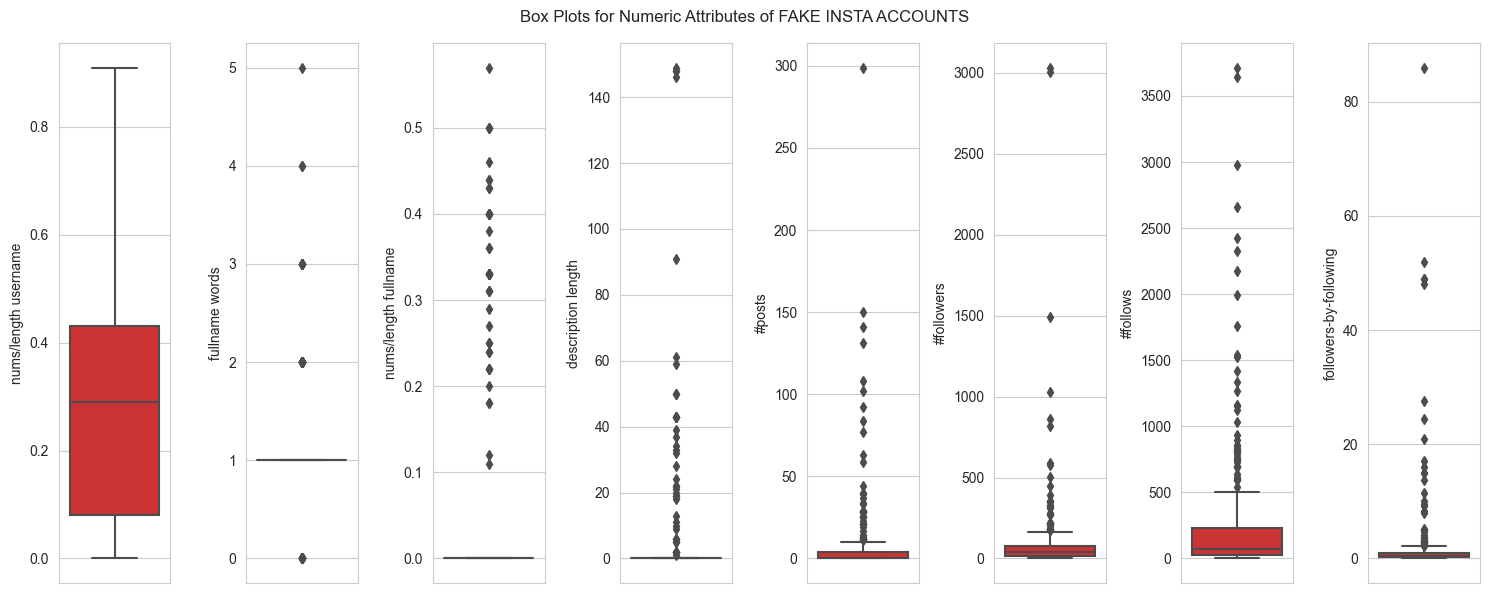

In [29]:
# Set the color palette
palette = sns.color_palette("Set1")
# Set the style of the plot
sns.set_style("whitegrid")

# Create a box plot for each column grouped by class
plt.figure(figsize=(8, 6))

# Create a figure with subplots
fig, axs = plt.subplots(1, len(numeric_attributes), figsize=(15, 6))

# Iterate over the columns and create box plots
for i, column in enumerate(numeric_attributes):
    sns.boxplot(y=column, data=features_fake, ax=axs[i], palette=palette)

# Set the overall title for the plot
fig.suptitle('Box Plots for Numeric Attributes of FAKE INSTA ACCOUNTS')
# Adjust the spacing between subplots
fig.tight_layout()
# Show the plot
plt.show()

> #### Real Accounts

<Figure size 800x600 with 0 Axes>

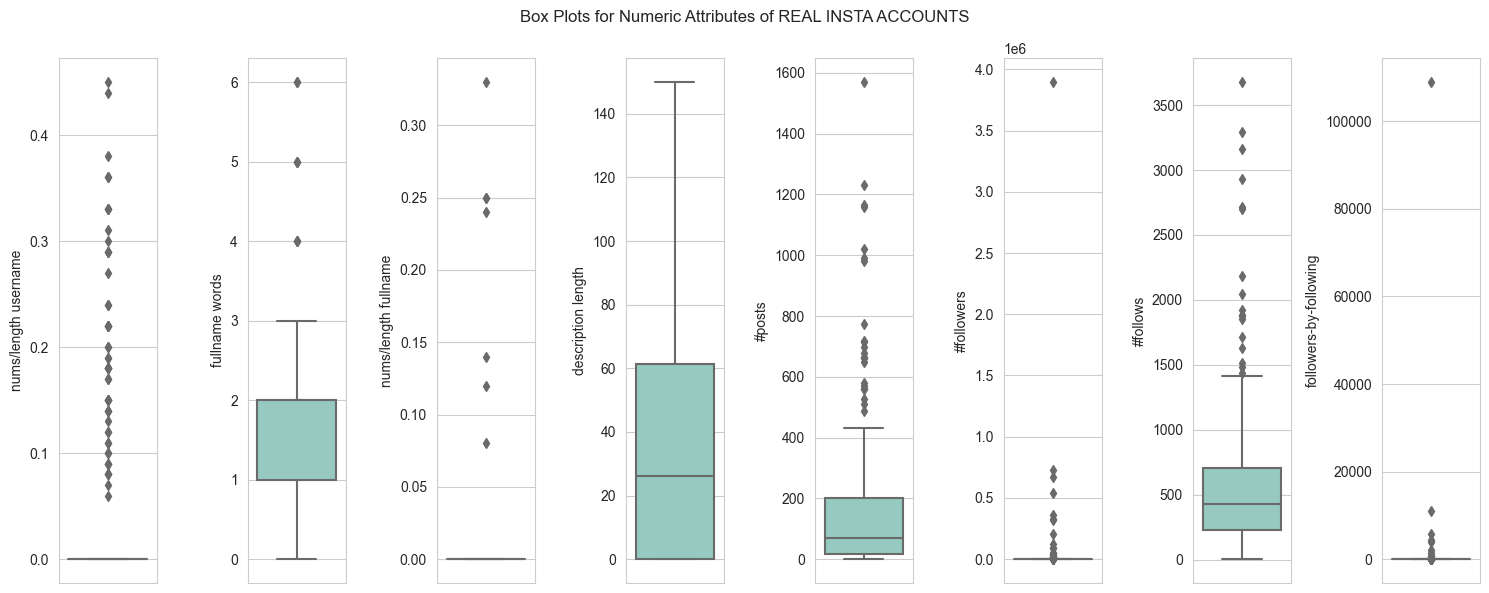

In [30]:
# Set the style of the plot
sns.set_style("whitegrid")
# Set the color palette
palette = sns.color_palette("Set3")
# Create a box plot for each column grouped by class
plt.figure(figsize=(8, 6))

# Create a figure with subplots
fig, axs = plt.subplots(1, len(numeric_attributes), figsize=(15, 6))

# Iterate over the columns and create box plots
for i, column in enumerate(numeric_attributes):
    sns.boxplot(y=column, data=features_real, ax=axs[i], palette=palette)

# Set the overall title for the plot
fig.suptitle('Box Plots for Numeric Attributes of REAL INSTA ACCOUNTS')
# Adjust the spacing between subplots
fig.tight_layout()
# Show the plot
plt.show()

#### Pair plot for all numerical values with fake account information

Text(0.5, 0.98, 'Pair Plot of Numeric Characteristics of The Dataset')

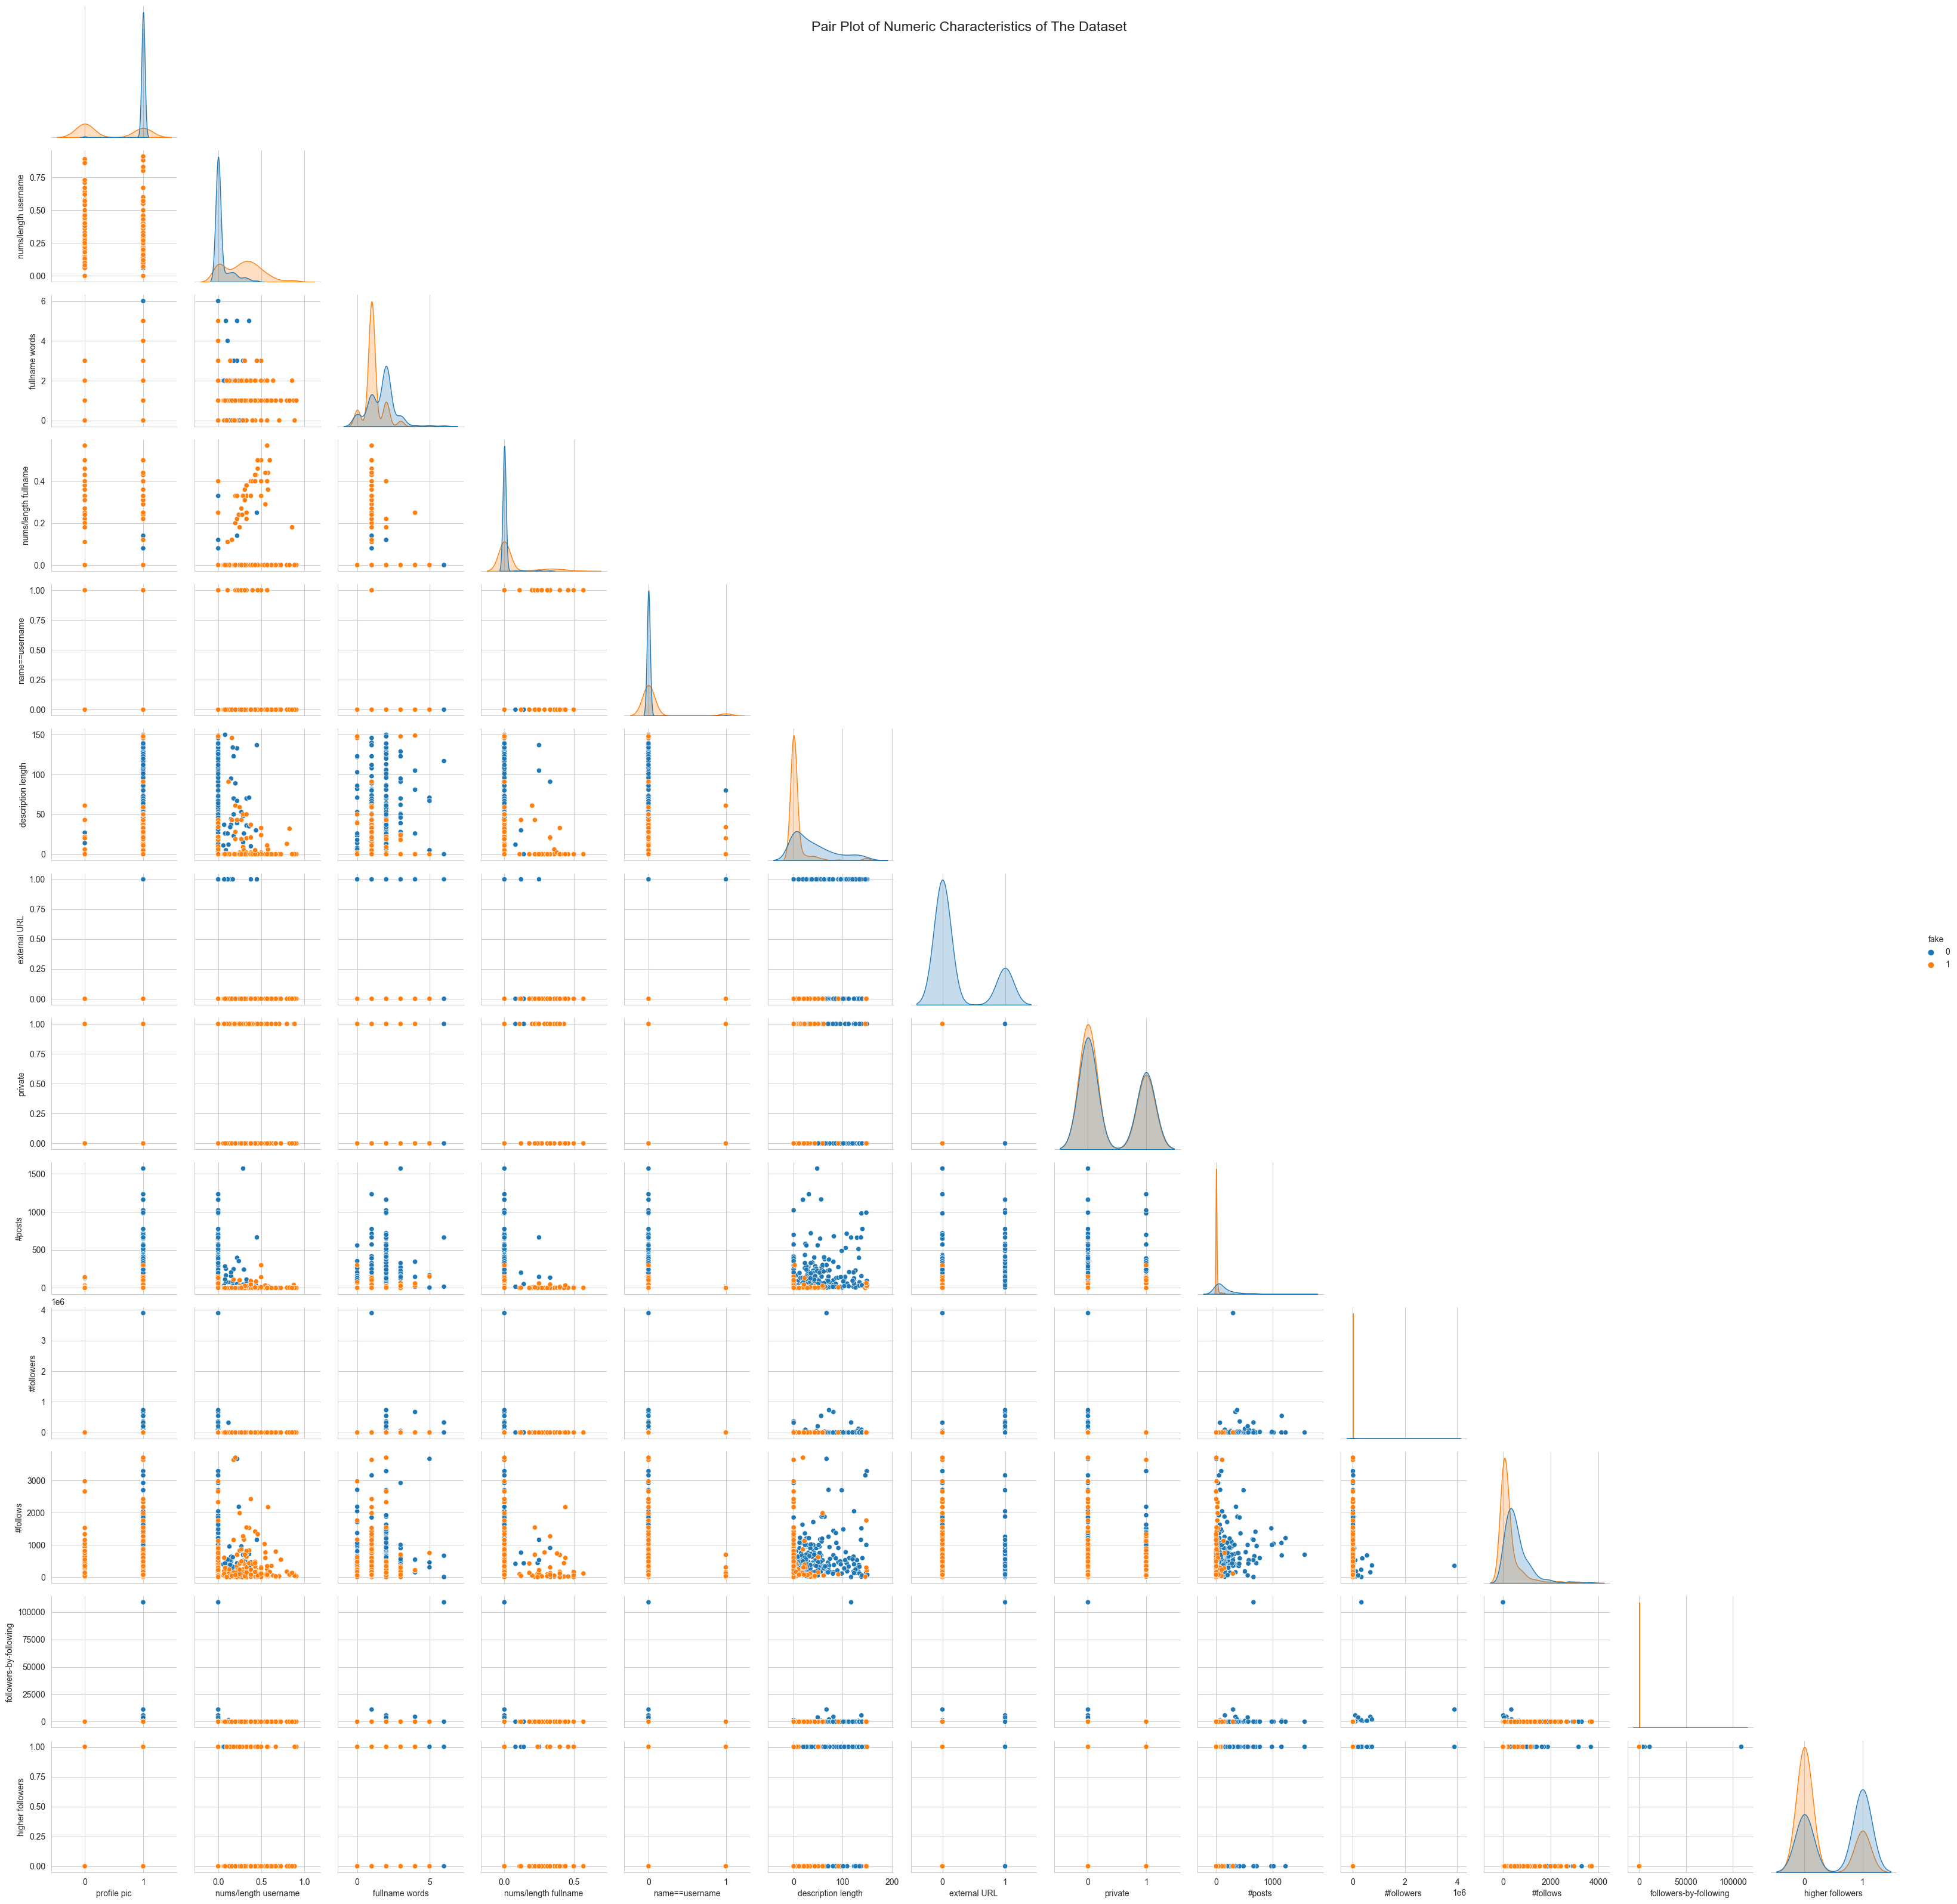

In [31]:
# Pair plot for all numerical values with fake account information
pp_cols = []
pp_cols = numeric_attributes + ['fake']
ax=sns.pairplot(df_train, hue="fake",corner=True);
plt.style.use('fivethirtyeight')
ax.fig.suptitle("Pair Plot of Numeric Characteristics of The Dataset")

In [32]:
df_train.groupby('fake')['private'].value_counts()

fake  private
0     0          161
      1          111
1     0          176
      1          105
Name: count, dtype: int64

In [33]:
# df_train = df_train.drop('private',axis = 1)
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,1.047120,1,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,5.140713,1,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,1.622449,1,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0.635945,0,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,1.198413,1,0


#### Dropping the Columns from each pair of columns which are highly correlated to each other

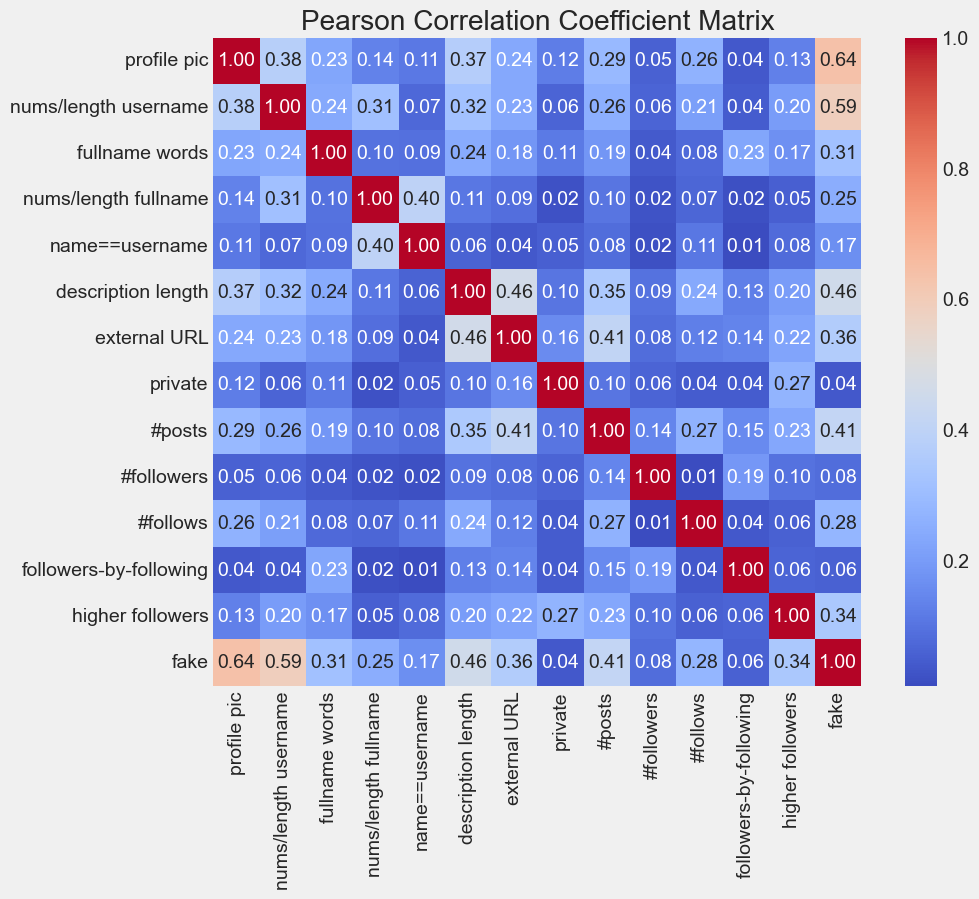

In [34]:
def drop_highly_correlated_columns(df, threshold):
    # Create a correlation matrix
    corr_matrix = df.corr().abs()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

    # Set plot title
    plt.title("Pearson Correlation Coefficient Matrix")

    # Show the plot
    plt.show()
    
    # Create a mask to identify highly correlated columns
    mask = corr_matrix.mask(~(corr_matrix > threshold), 0)
    
    # Find the columns to drop
    columns_to_drop = set()
    for column in mask.columns:
        correlated_columns = mask[mask[column] > 0].index.tolist()
        columns_to_drop.update(correlated_columns[1:])  # Drop all but the first column in each pair
    
    # Drop the highly correlated columns
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

threshold = 0.995  # Define the correlation threshold
df_train = drop_highly_correlated_columns(df_train, threshold)

#### Dropping Columns which are negligibly correlated with the Target Class Column

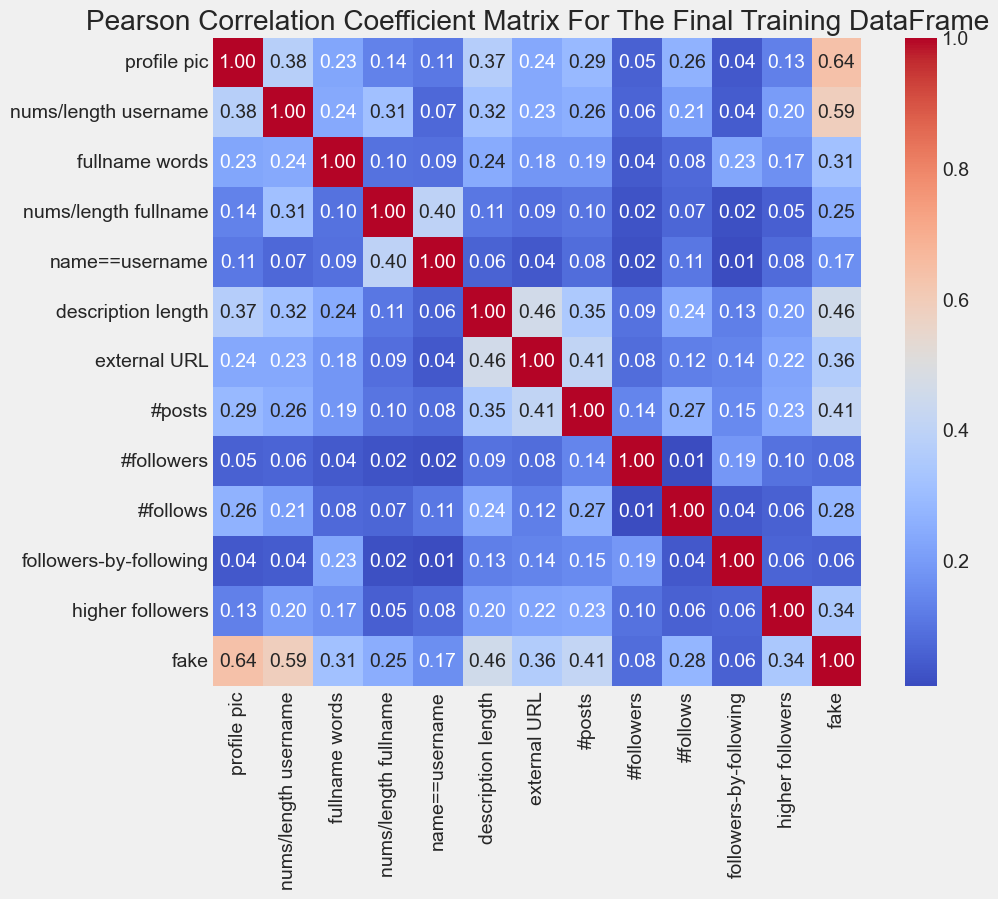

In [35]:
def drop_low_correlation_columns(df, target_column, threshold):
    # Calculate the correlation between each feature and the target column
    correlations = df.drop(columns=target_column).corrwith(df[target_column])
    
    # Find the columns with correlation below the threshold
    columns_to_drop = correlations[correlations.abs() < threshold].index.tolist()
    
    # Drop the columns with low correlation
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

target_column = 'fake'  
threshold = 0.05  # Define the correlation threshold to 0.05
df_train = drop_low_correlation_columns(df_train, target_column, threshold)




# Create a correlation matrix
corr_matrix = df_train.corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Set plot title
plt.title("Pearson Correlation Coefficient Matrix For The Final Training DataFrame")

# Show the plot
plt.show()


In [36]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.27,0,0.0,0,53,0,32,1000,955,1.047120,1,0
1,1,0.00,2,0.0,0,44,0,286,2740,533,5.140713,1,0
2,1,0.10,2,0.0,0,0,0,13,159,98,1.622449,1,0
3,1,0.00,1,0.0,0,82,0,679,414,651,0.635945,0,0
4,1,0.00,2,0.0,0,0,0,6,151,126,1.198413,1,0


#### Final List of selected columns

In [37]:
final_column_list = df_train.columns
print(list(final_column_list))

['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', '#posts', '#followers', '#follows', 'followers-by-following', 'higher followers', 'fake']


In [38]:
df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


#### Feature Engineering on the Test Dataset
> #### Creating 'followers-by-following' and 'higher followers' columns as attributes same as created for Training Dataset

In [39]:
labels = df_test['fake']
df_test = df_test.drop(columns = ['fake'],axis=1)
df_test['followers-by-following']=df_test['#followers'] / df_test['#follows'].replace(0,1)
df_test['higher followers'] = (df_test['#followers'] > df_test['#follows']).astype(int)
df_test['fake'] = labels

In [40]:
df_test.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.807947,0,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,5.833333,1,0


#### Dropped Columns

In [41]:
columns_to_drop = list(set(df_test.columns) - set(df_train.columns))
print(columns_to_drop)

['private']


In [42]:
df_train.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.27,0,0.0,0,53,0,32,1000,955,1.047120,1,0
1,1,0.00,2,0.0,0,44,0,286,2740,533,5.140713,1,0


In [43]:
df_test.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.807947,0,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,5.833333,1,0


In [44]:
df_test = df_test.drop(columns = columns_to_drop,axis = 1)

In [45]:
df_train.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.27,0,0.0,0,53,0,32,1000,955,1.047120,1,0
1,1,0.00,2,0.0,0,44,0,286,2740,533,5.140713,1,0


In [46]:
df_test.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,#posts,#followers,#follows,followers-by-following,higher followers,fake
0,1,0.33,1,0.33,1,30,0,35,488,604,0.807947,0,0
1,1,0.00,5,0.00,0,64,0,3,35,6,5.833333,1,0


# Model Training, Testing and Evaluation

> ### Creating User Defined Function to Find Best ML Model for our Project using Grid Search Cross Validation Technique using Cross Validation & Hyper-parameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def standardize(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)
    
def find_best_model_through_Grid_Search_CV(X,y,models): 
    # Dictionary to store results
    results = {}
    
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 10)
    
    # Perform GridSearchCV for each model
    for model_name, model_config in models.items():
        model = model_config['model']
        parameters = model_config['parameters']

        grid_search = GridSearchCV(model, parameters, cv=cv, scoring = 'accuracy')
        grid_search.fit(X_train, y_train)  # Replace X and y with your data

        results[model_name] = {
            'model': grid_search.best_estimator_,
            'best_parameters': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }
    return results


### Taking Various Supervised Learning Classifier with Different Hyperparameter Configuration for Grid Search CV Technique
### Models going to be Tested using GridSearchCV are :-
> - #### K Nearest Neighbour Classifier
> - #### SVM Classifier
> - #### Decision Tree Classifier
> - #### Random Forest Classifier (Ensemble Bagging Alogrithm using Decision Trees)
> - #### XGBoost Classifier (Ensemble Boosting Algorithm using Decision Stumps)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

X_train = df_train.drop('fake', axis=1).values
y_train = df_train['fake'].values


X_test = df_test.drop('fake', axis=1).values
y_test = df_test['fake'].values


# Dictionary of models with hyperparameter configurations
models = {
    'K Nearest Neighbour Classifier': {
        'model': KNeighborsClassifier(),
            'parameters':  {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    },
    'SVM Classifier': {
        'model': SVC(),
        'parameters': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },  
    'Decision Tree Classifier':{
        'model': DecisionTreeClassifier(),
        'parameters': {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['sqrt', 'log2', None]}
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'parameters': {'n_estimators': [100, 200, 300]}
    },
    
    'XGBoost Classifier':{
        'model': XGBClassifier(),
        'parameters': {'n_estimators': range(70,130),'n_jobs': [None,10]}
    }
}

#### Training and Testing each ML Model with Hyperparameter Tuning along with Cross Validation (using Grid Search CV Technique)
#### Publish Classification Report for each model along with best set of Hyperparameters used during Training

In [49]:
#For Non-Standardized Data
results = find_best_model_through_Grid_Search_CV(X_train,y_train,models)

#Selecting Best Model based on Best Accuracy Score
best_model_name = ''
best_score = 0
# Print the results
for model_name, result in results.items():
    if result['best_score'] > best_score:
        best_score = result['best_score']
        best_model_name = model_name
    print('---------------------------------------------------------------------------------------------------------------')
    print(f"Model: {model_name}")
    print('---------------------------------------------------------------------------------------------------------------')
    print(f"Best Parameters: {result['best_parameters']}")
    print(f"Best Score: {result['best_score']}")
    print('\n\nClassification Report for the Test Dataset\n\n',classification_report(y_test,result['model'].predict(X_test)))
    print('---------------------------------------------------------------------------------------------------------------')
    print("\n\n")

---------------------------------------------------------------------------------------------------------------
Model: K Nearest Neighbour Classifier
---------------------------------------------------------------------------------------------------------------
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.9054054054054055


Classification Report for the Test Dataset

               precision    recall  f1-score   support

           0       0.84      0.88      0.86        60
           1       0.87      0.83      0.85        58

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118

---------------------------------------------------------------------------------------------------------------



---------------------------------------------------------------------------------------------------------------
Model: SVM Classifier
---

#### Final overview of all the Training Models with their Training Validation Score and their Best Parameters obtained after performing Hyperparameter Tuning using Grid Search CV Method

In [50]:
model_df = pd.DataFrame(results)
model_df

,K Nearest Neighbour Classifier,SVM Classifier,Decision Tree Classifier,Random Forest Classifier,XGBoost Classifier
model,"KNeighborsClassifier(metric='manhattan', n_nei...","SVC(C=10, kernel='linear')","DecisionTreeClassifier(max_features='sqrt', mi...","(DecisionTreeClassifier(max_features='sqrt', r...","XGBClassifier(base_score=None, booster=None, c..."
best_parameters,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...","{'C': 10, 'kernel': 'linear'}","{'criterion': 'gini', 'max_depth': None, 'max_...",{'n_estimators': 200},"{'n_estimators': 105, 'n_jobs': None}"
best_score,0.905405,0.925225,0.915315,0.934234,0.932432


 #### Random Forest Classifier outperformed all the other classifiers on the Training as well as Testing Dataset
 #### XGBoost Classifier is the second best model with almost same accuracy as the Random Forest Classifier

> #### Let's train these two best Classifiers on the Entire Training Dataset and Evaluate on the whole Test Dataset

## Selecting the Best Classifiers (Random Forest Classifier and XGBoost Classifier) 

## Random Forest Classifier

> #### Training the Model on the Training Dataset and Testing the Model on the Testing DataSet and Calculating Various Evaluation Metric Scores

In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=200)
rfc_trained_model = rfc_model.fit(X_train,y_train)
y_pred = rfc_trained_model.predict(X_test)

print('---------------------------------------------------------------------------------------------------------------')
print('                                          RANDOM FOREST CLASSIFIER                                                  ')
print('---------------------------------------------------------------------------------------------------------------')
# Calculate evaluation metrics on the test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print('---------------------------------------------------------------------------------------------------------------')
print('\n\nClassification Report for the Test Dataset\n\n',classification_report(y_test,y_pred))
print('---------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------
                                          RANDOM FOREST CLASSIFIER                                                  
---------------------------------------------------------------------------------------------------------------
Accuracy: 0.9576271186440678
F1 Score: 0.9579831932773109
Precision: 0.9344262295081968
Recall: 0.9827586206896551
---------------------------------------------------------------------------------------------------------------


Classification Report for the Test Dataset

               precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.93      0.98      0.96        58

    accuracy                           0.96       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.96      0.96      0.96       118

----------------------------------------------------------

### Random Forest Classifier | Final Test DataSet Metrics : ***Accuracy : 95.76 %*** and ***F1-Score = 95.8%***

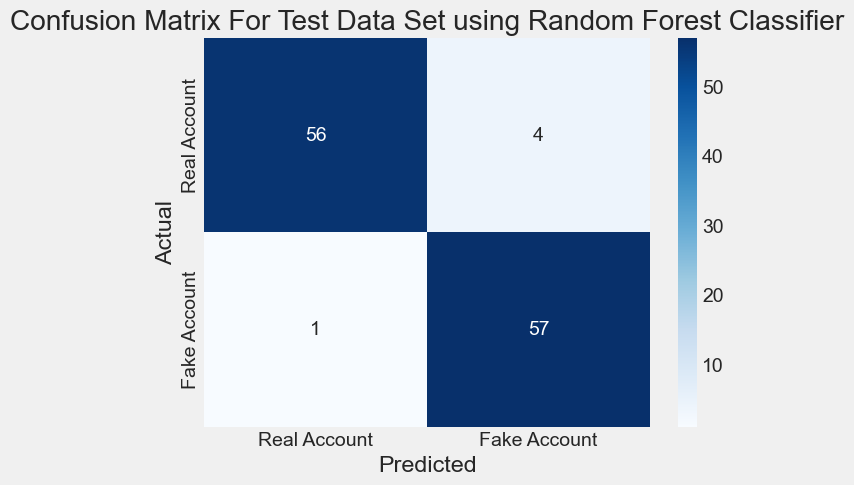

In [118]:
# Create the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Define class labels (optional)
class_labels = ['Real Account', 'Fake Account']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Test Data Set using Random Forest Classifier")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Display the plot
plt.show()

#### *Saving the final Random Forest Classifier Model (Test DataSet Metrics : Accuracy = 95.76 % and F1-Score = 95.73%)*

In [119]:
import joblib
# Save the final Random Forest Classifier Model to a file
joblib.dump(rfc_trained_model, 'fake_insta_profile_detection_model_rfc.pkl')

['fake_insta_profile_detection_model_rfc.pkl']

## XGBoost Classifier

> #### Training the Model on the Training Dataset and Testing the Model on the Testing DataSet and Calculating Various Evaluation Metric Scores

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(n_estimators=788)
Xgb_trained_model = xgb_model.fit(X_train,y_train)
y_pred = Xgb_trained_model.predict(X_test)

print('---------------------------------------------------------------------------------------------------------------')
print('                                          XGBOOST CLASSIFIER                                                  ')
print('---------------------------------------------------------------------------------------------------------------')
# Calculate evaluation metrics on the test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print('---------------------------------------------------------------------------------------------------------------')
print('\n\nClassification Report for the Test Dataset\n\n',classification_report(y_test,y_pred))
print('---------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------
                                          XGBOOST CLASSIFIER                                                  
---------------------------------------------------------------------------------------------------------------
Accuracy: 0.9576271186440678
F1 Score: 0.9572649572649573
Precision: 0.9491525423728814
Recall: 0.9655172413793104
---------------------------------------------------------------------------------------------------------------


Classification Report for the Test Dataset

               precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.95      0.97      0.96        58

    accuracy                           0.96       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.96      0.96      0.96       118

----------------------------------------------------------------

### XGBoost Classifier | Final Test DataSet Metrics : ***Accuracy : 95.76 %*** and ***F1-Score = 95.73%***

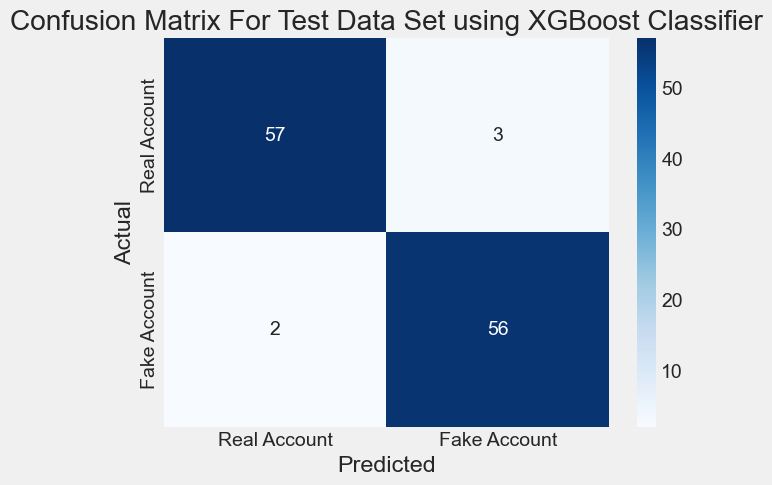

In [121]:
# Create the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Define class labels (optional)
class_labels = ['Real Account', 'Fake Account']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Test Data Set using XGBoost Classifier")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

# Display the plot
plt.show()

#### *Saving the final XGBoost Classifier Model (Test DataSet Metrics : Accuracy = 95.76 % and F1-Score = 95.73%)*

In [122]:
import joblib
# Save the final XGBoost Classifier Model to a file
joblib.dump(Xgb_trained_model, 'fake_insta_profile_detection_model_xgboost.pkl')

['fake_insta_profile_detection_model_xgboost.pkl']